# HW1: Shallow Neural Network

## Part 1: Shallow Neural Network 

Chloe Quinto     
CS 583 Deep Learning        

In [1]:
import warnings 
warnings.filterwarnings('ignore') # feel free to comment this out 

import h5py
import numpy as np
import matplotlib.pyplot as plt 

import sklearn 
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.utils import to_categorical
from keras import layers
from keras import models 
from keras.layers import Dense
from keras import optimizers 
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf


Using TensorFlow backend.


# 1. Preprocessing 

### 1.1 Load Dataset 

In [2]:
wine = sklearn.datasets.load_wine()

print("Wine Features:", wine.feature_names)
print('\n')
print("Wine Data:", wine.data)
print('\n')
print("Wine Target:", wine.target)

Wine Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Wine Data: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Wine Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### 1.2 Build Dataframe 

In [3]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df["class"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 1.3 Check for Null Values 

In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 1.4 Partition data into training and testing set

In [5]:
labels = df.loc[:,["class"]] 
features = df.drop(["class"],axis=1)
print(labels.shape)
print(features.shape)

(178, 1)
(178, 13)


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels)

### 1.5 Convert class vectors (0,1,2) into binary class matrices 

In [7]:
ytrain = to_categorical(ytrain, 3)
ytest = to_categorical(ytest,3)

In [8]:
print("xtrain", xtrain.shape)
print("xtest", xtest.shape)
print("ytrain", ytrain.shape)
print("ytest", ytest.shape)

xtrain (133, 13)
xtest (45, 13)
ytrain (133, 3)
ytest (45, 3)


### 1.6 Scale data between 0 and 1 

In [9]:
scale = MinMaxScaler(feature_range=(0,1))
xtrain = scale.fit_transform(xtrain)
xtest = scale.fit_transform(xtest)

### 1.7  Randomly partition the training set to training and validation sets 

Randomly partition the 133 training samples into two sets 
* a training set containing  100 samples 
* a validation set containing 33 samples 

In [10]:
rand_idx = np.random.permutation(133)
train_idx = rand_idx[0:100]
valid_idx = rand_idx[100:133]

xval = xtrain[valid_idx,:]
yval = ytrain[valid_idx,:]

xtr = xtrain[train_idx, :]
ytr = ytrain[train_idx,:]

print("Shape of xtrain: ", xtr.shape)
print("Shape of ytrain: ", ytr.shape)
print("Shape of xval: ", xval.shape)
print("Shape of yval: ", yval.shape)

Shape of xtrain:  (100, 13)
Shape of ytrain:  (100, 3)
Shape of xval:  (33, 13)
Shape of yval:  (33, 3)


# 2. Build NN and tune its hyper-parameters

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=13,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


###  2.1 Initial Weights and Biases 

In [12]:
print("Weights", model.layers[0].get_weights()[0])
print("\n")
print("Bias", model.layers[0].get_weights()[1])

Weights [[-0.23375249 -0.11498705 -0.02183491  0.0474472   0.20973998  0.30498958
   0.3577885   0.00543708 -0.22597104  0.11209702]
 [-0.23742491  0.4870684   0.16743475 -0.36352402  0.07882041  0.08081239
  -0.4962974  -0.14061007  0.3424961   0.39844465]
 [ 0.15559953  0.05966657 -0.41299498 -0.1801596  -0.01605812  0.18880486
  -0.28170264  0.32852137  0.48411077  0.19822049]
 [-0.22350928  0.12545079 -0.33218032 -0.00062335  0.43006748 -0.04421926
  -0.21797493  0.16216063 -0.16116089  0.44788462]
 [-0.00690907  0.4127534   0.24770904 -0.49712715 -0.17409006 -0.462999
  -0.04082203  0.14002436 -0.21668535  0.07369971]
 [-0.14710107 -0.15580094  0.11329341 -0.39136553 -0.14551595  0.4973603
  -0.24767068  0.3603859  -0.2566652  -0.39018834]
 [-0.01672313 -0.42940807  0.37153023  0.23249662 -0.03777027  0.10575688
  -0.24829146  0.0474174  -0.45110357 -0.3136328 ]
 [-0.09234855 -0.2492643  -0.41411752  0.10346669  0.3472907  -0.12758619
  -0.26723367  0.23076779 -0.0342682   0.39174

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 367
Trainable params: 367
Non-trainable params: 0
________________________________________________________

In [14]:
model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])

### 2.2 Save the weights of our model

In [15]:
checkpoint = ModelCheckpoint("../weights/model_part1.hdf5", monitor="loss", verbose=1, save_best_only = True, mode="auto", period=1)

### 2.3 Apply early stopping to prevent overfitting

In [16]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)

### 2.4 Train the model 

In [17]:
history = model.fit(xtr, ytr, batch_size=50, epochs=2000, verbose =1, validation_data=(xval,yval), callbacks=[checkpoint,monitor])

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 33 samples
Epoch 1/2000
100/100 [==============================] - 0s 2ms/step - loss: 1.1504 - acc: 0.2700 - val_loss: 1.0675 - val_acc: 0.5152

Epoch 00001: loss improved from inf to 1.15043, saving model to ../weights/model_part1.hdf5
Epoch 2/2000
100/100 [==============================] - 0s 51us/step - loss: 1.1283 - acc: 0.2900 - val_loss: 1.0605 - val_acc: 0.5152

Epoch 00002: loss improved from 1.15043 to 1.12828, saving model to ../weights/model_part1.hdf5
Epoch 3/2000
100/100 [==============================] - 0s 59us/step - loss: 1.1140 - acc: 0.3200 - val_loss: 1.0544 - val_acc: 0.6061

Epoch 00003: loss improved from 1.12828 to 1.11401, saving model to ../weights/model_part1.hdf5
Epoch 4/2000
100/100 [==============================] - 0s 225us/step - loss: 1.1048 - acc: 0.3400 - val_loss: 1.0499 - val_acc: 0.6667

Epoch 00004: loss improved from 1.11401 to 1.10483, saving model to ../weights/

Epoch 35/2000
100/100 [==============================] - 0s 74us/step - loss: 0.9655 - acc: 0.7500 - val_loss: 0.8785 - val_acc: 0.8485

Epoch 00035: loss improved from 0.97038 to 0.96552, saving model to ../weights/model_part1.hdf5
Epoch 36/2000
100/100 [==============================] - 0s 74us/step - loss: 0.9586 - acc: 0.7400 - val_loss: 0.8732 - val_acc: 0.9091

Epoch 00036: loss improved from 0.96552 to 0.95858, saving model to ../weights/model_part1.hdf5
Epoch 37/2000
100/100 [==============================] - 0s 50us/step - loss: 0.9536 - acc: 0.7500 - val_loss: 0.8647 - val_acc: 0.8788

Epoch 00037: loss improved from 0.95858 to 0.95365, saving model to ../weights/model_part1.hdf5
Epoch 38/2000
100/100 [==============================] - 0s 41us/step - loss: 0.9484 - acc: 0.7400 - val_loss: 0.8591 - val_acc: 0.9091

Epoch 00038: loss improved from 0.95365 to 0.94842, saving model to ../weights/model_part1.hdf5
Epoch 39/2000
100/100 [==============================] - 0s 84us/ste

100/100 [==============================] - 0s 62us/step - loss: 0.7546 - acc: 0.8000 - val_loss: 0.6213 - val_acc: 0.9091

Epoch 00070: loss improved from 0.75924 to 0.75457, saving model to ../weights/model_part1.hdf5
Epoch 71/2000
100/100 [==============================] - 0s 70us/step - loss: 0.7471 - acc: 0.8000 - val_loss: 0.6154 - val_acc: 0.9091

Epoch 00071: loss improved from 0.75457 to 0.74713, saving model to ../weights/model_part1.hdf5
Epoch 72/2000
100/100 [==============================] - 0s 67us/step - loss: 0.7409 - acc: 0.8000 - val_loss: 0.6087 - val_acc: 0.9091

Epoch 00072: loss improved from 0.74713 to 0.74087, saving model to ../weights/model_part1.hdf5
Epoch 73/2000
100/100 [==============================] - 0s 76us/step - loss: 0.7346 - acc: 0.8000 - val_loss: 0.6053 - val_acc: 0.9394

Epoch 00073: loss improved from 0.74087 to 0.73462, saving model to ../weights/model_part1.hdf5
Epoch 74/2000
100/100 [==============================] - 0s 51us/step - loss: 0.72

100/100 [==============================] - 0s 47us/step - loss: 0.5431 - acc: 0.8900 - val_loss: 0.4158 - val_acc: 0.9697

Epoch 00105: loss did not improve from 0.54259
Epoch 106/2000
100/100 [==============================] - 0s 89us/step - loss: 0.5314 - acc: 0.8900 - val_loss: 0.4111 - val_acc: 0.9697

Epoch 00106: loss improved from 0.54259 to 0.53138, saving model to ../weights/model_part1.hdf5
Epoch 107/2000
100/100 [==============================] - 0s 44us/step - loss: 0.5261 - acc: 0.8900 - val_loss: 0.4063 - val_acc: 0.9697

Epoch 00107: loss improved from 0.53138 to 0.52609, saving model to ../weights/model_part1.hdf5
Epoch 108/2000
100/100 [==============================] - 0s 59us/step - loss: 0.5207 - acc: 0.8900 - val_loss: 0.4025 - val_acc: 0.9697

Epoch 00108: loss improved from 0.52609 to 0.52073, saving model to ../weights/model_part1.hdf5
Epoch 109/2000
100/100 [==============================] - 0s 67us/step - loss: 0.5183 - acc: 0.8700 - val_loss: 0.3989 - val_acc

100/100 [==============================] - 0s 95us/step - loss: 0.3712 - acc: 0.9500 - val_loss: 0.2736 - val_acc: 1.0000

Epoch 00140: loss improved from 0.37496 to 0.37122, saving model to ../weights/model_part1.hdf5
Epoch 141/2000
100/100 [==============================] - 0s 115us/step - loss: 0.3658 - acc: 0.9700 - val_loss: 0.2699 - val_acc: 1.0000

Epoch 00141: loss improved from 0.37122 to 0.36581, saving model to ../weights/model_part1.hdf5
Epoch 142/2000
100/100 [==============================] - 0s 126us/step - loss: 0.3619 - acc: 0.9700 - val_loss: 0.2666 - val_acc: 1.0000

Epoch 00142: loss improved from 0.36581 to 0.36187, saving model to ../weights/model_part1.hdf5
Epoch 143/2000
100/100 [==============================] - 0s 129us/step - loss: 0.3581 - acc: 0.9700 - val_loss: 0.2630 - val_acc: 1.0000

Epoch 00143: loss improved from 0.36187 to 0.35809, saving model to ../weights/model_part1.hdf5
Epoch 144/2000
100/100 [==============================] - 0s 230us/step - lo

100/100 [==============================] - 0s 149us/step - loss: 0.2310 - acc: 0.9900 - val_loss: 0.1689 - val_acc: 1.0000

Epoch 00175: loss improved from 0.23543 to 0.23103, saving model to ../weights/model_part1.hdf5
Epoch 176/2000
100/100 [==============================] - 0s 168us/step - loss: 0.2265 - acc: 0.9900 - val_loss: 0.1681 - val_acc: 1.0000

Epoch 00176: loss improved from 0.23103 to 0.22650, saving model to ../weights/model_part1.hdf5
Epoch 177/2000
100/100 [==============================] - 0s 401us/step - loss: 0.2209 - acc: 0.9900 - val_loss: 0.1626 - val_acc: 1.0000

Epoch 00177: loss improved from 0.22650 to 0.22094, saving model to ../weights/model_part1.hdf5
Epoch 178/2000
100/100 [==============================] - 0s 162us/step - loss: 0.2171 - acc: 0.9900 - val_loss: 0.1625 - val_acc: 1.0000

Epoch 00178: loss improved from 0.22094 to 0.21712, saving model to ../weights/model_part1.hdf5
Epoch 179/2000
100/100 [==============================] - 0s 129us/step - l

100/100 [==============================] - 0s 50us/step - loss: 0.0967 - acc: 0.9900 - val_loss: 0.0760 - val_acc: 1.0000

Epoch 00210: loss improved from 0.09893 to 0.09669, saving model to ../weights/model_part1.hdf5
Epoch 211/2000
100/100 [==============================] - 0s 71us/step - loss: 0.0945 - acc: 0.9900 - val_loss: 0.0734 - val_acc: 1.0000

Epoch 00211: loss improved from 0.09669 to 0.09449, saving model to ../weights/model_part1.hdf5
Epoch 212/2000
100/100 [==============================] - 0s 44us/step - loss: 0.0983 - acc: 0.9900 - val_loss: 0.0728 - val_acc: 1.0000

Epoch 00212: loss did not improve from 0.09449
Epoch 213/2000
100/100 [==============================] - 0s 98us/step - loss: 0.0898 - acc: 0.9900 - val_loss: 0.0717 - val_acc: 1.0000

Epoch 00213: loss improved from 0.09449 to 0.08984, saving model to ../weights/model_part1.hdf5
Epoch 214/2000
100/100 [==============================] - 0s 78us/step - loss: 0.0877 - acc: 0.9900 - val_loss: 0.0722 - val_acc

100/100 [==============================] - 0s 66us/step - loss: 0.0447 - acc: 0.9900 - val_loss: 0.0341 - val_acc: 1.0000

Epoch 00247: loss improved from 0.04572 to 0.04472, saving model to ../weights/model_part1.hdf5
Epoch 248/2000
100/100 [==============================] - 0s 47us/step - loss: 0.0431 - acc: 0.9900 - val_loss: 0.0340 - val_acc: 1.0000

Epoch 00248: loss improved from 0.04472 to 0.04311, saving model to ../weights/model_part1.hdf5
Epoch 249/2000
100/100 [==============================] - 0s 55us/step - loss: 0.0430 - acc: 0.9900 - val_loss: 0.0317 - val_acc: 1.0000

Epoch 00249: loss improved from 0.04311 to 0.04301, saving model to ../weights/model_part1.hdf5
Epoch 250/2000
100/100 [==============================] - 0s 66us/step - loss: 0.0445 - acc: 0.9900 - val_loss: 0.0296 - val_acc: 1.0000

Epoch 00250: loss did not improve from 0.04301
Epoch 251/2000
100/100 [==============================] - 0s 57us/step - loss: 0.0425 - acc: 0.9900 - val_loss: 0.0326 - val_acc

# 3. Analysis

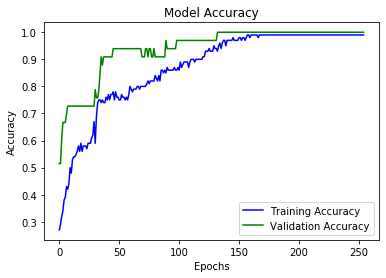

In [18]:
train_acc = history.history["acc"]
valid_acc = history.history["val_acc"]
epochs = range(len(history.history["loss"]))

plt.plot(epochs, train_acc, "b", label="Training Accuracy")
plt.plot(epochs, valid_acc, "g", label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

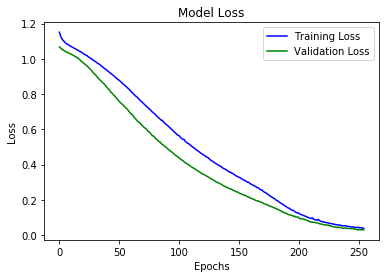

In [19]:
plt.plot(epochs, history.history["loss"], "b", label="Training Loss")
plt.plot(epochs, history.history["val_loss"], "g", label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

Discusion:    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Without early stopping, overfitting occurs on the model. In other words, the neural network is trained to the point that it begins to memorize rather than generalize. Without applying EarlyStopping()we would've seen overfitting on our validation 

### 3.1 Most Optimal Weights and Biases within each layer 

In [20]:
from keras.models import load_model
model = load_model('../weights/model_part1.hdf5')
for num, layer in enumerate(model.layers):
    if len(layer.weights) > 0:
        print(layer.name)
        print("weights", model.layers[num].get_weights()[0], "\n")
        print("bias", model.layers[num].get_weights()[1], "\n")
        print("=====================================================")

dense_1
weights [[-4.56983507e-01 -2.62888044e-01  3.54059488e-01 -4.63824198e-02
   4.00204509e-01  3.43677670e-01  3.57788503e-01  2.87498355e-01
   7.21735358e-02  3.67766231e-01]
 [-3.80531311e-01  4.79735732e-01  4.76741284e-01 -3.76198679e-01
   2.81386077e-01  1.29077151e-01 -4.96297389e-01 -5.90310507e-02
   5.33337295e-01  4.71620232e-01]
 [ 1.91485986e-01  8.99216011e-02 -1.03303827e-01 -3.38614494e-01
   9.58675072e-02  2.77905464e-01 -2.81702638e-01  4.51063067e-01
   6.31696045e-01  2.00905561e-01]
 [ 4.41057421e-02  3.36857527e-01 -1.97813720e-01  6.91276044e-02
   4.48110729e-01  9.97275487e-02 -2.17974931e-01 -2.29211804e-02
  -2.80626535e-01  2.26276174e-01]
 [ 2.13717707e-02  4.50321943e-01  4.80457962e-01 -6.39140129e-01
   5.17075956e-02 -3.33025187e-01 -4.08220291e-02  2.33997121e-01
  -6.87492862e-02  2.66395479e-01]
 [ 2.86587160e-02  1.51571976e-02  3.39592636e-01 -3.40179652e-01
  -1.59766540e-01  4.83478606e-01 -2.47670680e-01  3.56279016e-01
  -2.16826439e-01

# 4. Further Analysis

### 4.1 Let's find the most optimal learning rate for our model 

In [21]:
def buildNN():
    model = Sequential()
    model.add(Dense(10, input_dim=13,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model 
    
def training(model, learning_rate): 
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = learning_rate), metrics = ["acc"])
    checkpoint = ModelCheckpoint("../weights/model_part1_a.hdf5", monitor="loss", verbose=0, save_best_only = True, mode="auto", period=1)
    monitor = EarlyStopping(monitor='val_loss', min_delta=learning_rate, patience=5, verbose=0, mode='auto',restore_best_weights=True)
    history = model.fit(xtr, ytr, batch_size=50, epochs=2000, verbose =0, validation_data=(xval,yval), callbacks=[checkpoint,monitor])

    
def testing(model, learning_rate): 
    model.load_weights('../weights/model_part1_a.hdf5')
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = learning_rate), metrics = ["acc"])
    lossAndAcc = model.evaluate(xtest, ytest, verbose=0)
    return lossAndAcc[1]
    
def main(): 
    learning_rate = [1e-5, 1e-4,1e-3,1e-2, 1e-1]
    acc = []
    for i in range(len(learning_rate)):
        print("====", "Current Learning Rate", "====", learning_rate[i])
        model = buildNN()
        training(model, learning_rate[i])
        acc.append(testing(model, learning_rate[i])) # return loss
    return acc, learning_rate
    

In [22]:
acc, learning_rate = main()

==== Current Learning Rate ==== 1e-05
==== Current Learning Rate ==== 0.0001
==== Current Learning Rate ==== 0.001
==== Current Learning Rate ==== 0.01
==== Current Learning Rate ==== 0.1


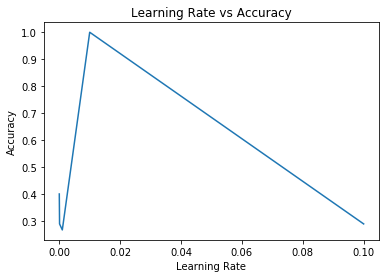

In [23]:
plt.plot(learning_rate, acc)
plt.title("Learning Rate vs Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

### 4.1 Discussion
It looks like the best learning rate for our model is 1e-3 

We will use this learning rate to find the best batch size for our model 

In [24]:
def buildNN():
    model = Sequential()
    model.add(Dense(10, input_dim=13,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model 
    
def training(model, bs): 
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])
    checkpoint = ModelCheckpoint("../weights/model_part1_b.hdf5", monitor="loss", verbose=0, save_best_only = True, mode="auto", period=1)
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto',restore_best_weights=True)
    history = model.fit(xtr, ytr, batch_size=bs, epochs=2000, verbose =0, validation_data=(xval,yval), callbacks=[checkpoint,monitor])

    
def testing(model): 
    model.load_weights('../weights/model_part1_b.hdf5')
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = 1e-3), metrics = ["acc"])
    lossAndAcc = model.evaluate(xtest, ytest, verbose=0)
    return lossAndAcc[1]
    
def main(): 
    bs = [40, 50, 60, 70]
    acc = []
    for i in range(len(bs)):
        print("====", "Current Learning Rate", "====", bs[i])
        model = buildNN()
        training(model, bs[i])
        acc.append(testing(model))
    return acc, bs
    

In [25]:
acc, bs = main()

==== Current Learning Rate ==== 40
==== Current Learning Rate ==== 50
==== Current Learning Rate ==== 60
==== Current Learning Rate ==== 70


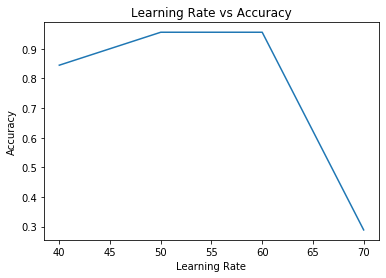

In [26]:
plt.plot(bs, acc)
plt.title("Learning Rate vs Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

### 4.2 Discussion 

It looks like the best batch size for our model is 60. Let's retrain the model knowing our best learning rate and batch size  

# 5. Retrain and Testing Model 

In [27]:
def buildNN():
    model = Sequential()
    model.add(Dense(10, input_dim=13,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model 
    
def training(model, learning_rate, bs): 
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = learning_rate), metrics = ["acc"])
    checkpoint = ModelCheckpoint("../weights/model_part1.hdf5", monitor="loss", verbose=0, save_best_only = True, mode="auto", period=1)
    monitor = EarlyStopping(monitor='val_loss', min_delta=learning_rate, patience=5, verbose=0, mode='auto',restore_best_weights=True)
    history = model.fit(xtr, ytr, batch_size=bs, epochs=2000, verbose =0, validation_data=(xval,yval), callbacks=[checkpoint,monitor])

    
def testing(model, learning_rate): 
    model.load_weights('../weights/model_part1.hdf5')
    model.compile(loss="categorical_crossentropy", optimizer = optimizers.RMSprop(lr = learning_rate), metrics = ["acc"])
    lossAndAcc = model.evaluate(xtest, ytest, verbose=0)
    return lossAndAcc[0], lossAndAcc[1]
    
def main(): 
    learning_rate = 1e-3
    batch_size=60
    model = buildNN()
    training(model, learning_rate, batch_size)
    return testing(model, learning_rate) 

In [28]:
loss, acc = main()
print("Loss", loss)
print("Accuracy", acc)

Loss 0.14899248944388496
Accuracy 0.9555555582046509
